# Introduction

Kernel Density Estimation is a statistical technique used to estimate the probability density function of a random variable. In this lab, we will use the scikit-learn Python library to demonstrate the principles of Kernel Density Estimation in one dimension.

# Plotting Histograms and Kernels

We first plot histograms and kernels to demonstrate the difference between the two. We will use a Gaussian kernel density estimation to show the difference between the two. We will also compare other kernels that are available in scikit-learn.

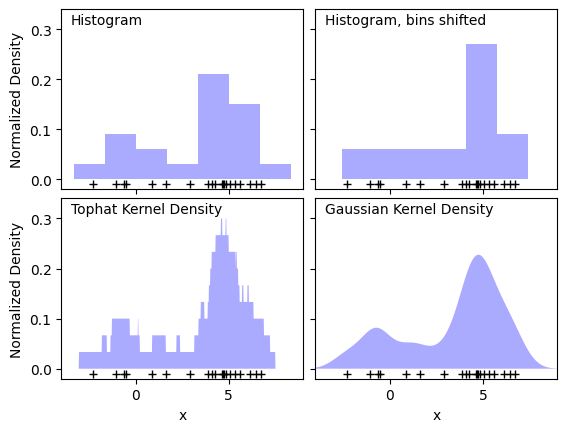

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Generate data
np.random.seed(1)
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

# Create figure and axes
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# Plot histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# Plot histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# Plot tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Plot Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

# Plot data points
for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

# Set y-axis label for left column
for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

# Set x-axis label for bottom row
for axi in ax[1, :]:
    axi.set_xlabel("x")

# Show plot
plt.show()

# Plotting Available Kernels

We will plot all available kernels to show their shapes.

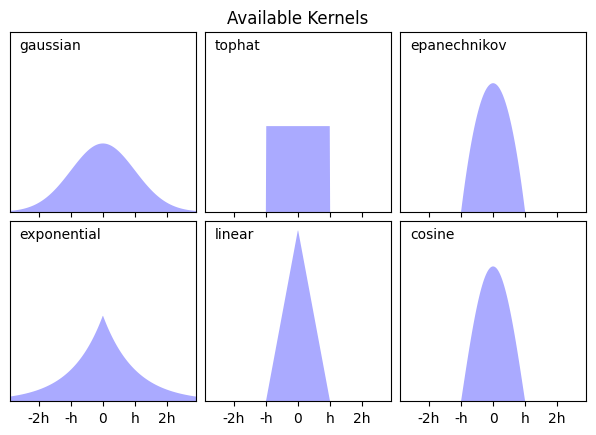

In [2]:
# Generate data
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

# Create figure and axes
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

# Format function for x-axis labels
def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x

# Plot available kernels
for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

# Set title for second row
ax[0, 1].set_title("Available Kernels")

# Show plot
plt.show()

# Plotting 1D Density Example

We will plot a 1D density example with 100 samples in one dimension. We will compare three different kernel density estimations: tophat, Gaussian, and epanechnikov.

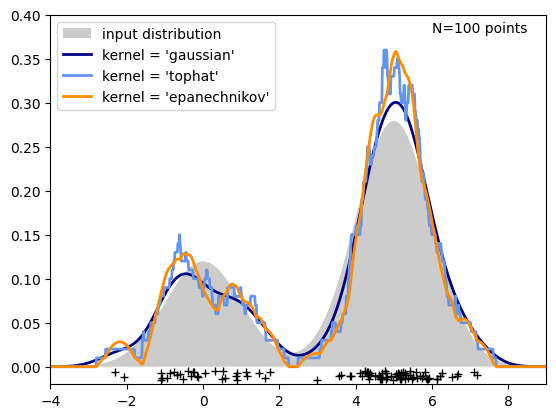

In [3]:
# Generate data
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

# Create figure and axes
fig, ax = plt.subplots()

# Plot input distribution
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")

# Set colors and kernels
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

# Plot kernel density estimations
for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

# Set legend and plot data points
ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

# Set x and y limits
ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)

# Show plot
plt.show()

# Summary

In this lab, we learned how to use the scikit-learn Python library to demonstrate the principles of Kernel Density Estimation in one dimension. We plotted histograms and kernels, available kernels, and a 1D density example. We also compared different kernel density estimations.